In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#https://climatedata.imf.org/

In [ ]:
df1=pd.read_csv("/content/drive/My Drive/Co2/CO2.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

df1.info()

<Figure size 1200x2000 with 0 Axes>

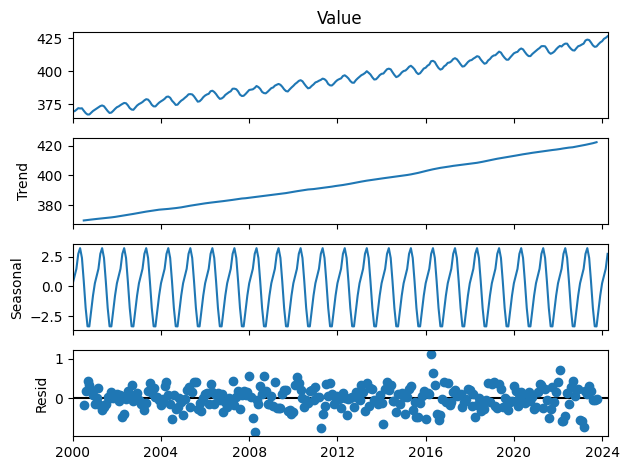

Trend Component:
Date
2000-01-01   NaN
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
Name: trend, dtype: float64

Seasonal Component:
Date
2000-01-01    0.255768
2000-02-01    0.888340
2000-03-01    1.468703
2000-04-01    2.723431
2000-05-01    3.202761
Name: seasonal, dtype: float64

Residual Component:
Date
2000-01-01   NaN
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
Name: resid, dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df1.set_index('Date', inplace=True)

# Decompose the time series
result = seasonal_decompose(df1['Value'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 20))
result.plot()
plt.show()

# Accessing the components
trend = result.trend
seasonal = result.seasonal
resid = result.resid

# Display the components
print("Trend Component:")
print(trend.head())
print("\nSeasonal Component:")
print(seasonal.head())
print("\nResidual Component:")
print(resid.head())

In [ ]:
pip3 install prophet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1.reset_index(inplace=True)
df1 = df1[['Date', 'Value']].reset_index(drop=True)
df1.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)
df1.tail(2)

,ds,y
290,2024-03-01,425.38
291,2024-04-01,426.57


In [ ]:
model = Prophet(growth='linear',
        daily_seasonality=False,
        weekly_seasonality=False,
        yearly_seasonality=True,
        seasonality_mode='multiplicative'
    )
model.fit(df1)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6v7blf84/xylznp9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6v7blf84/1_mhala3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83166', 'data', 'file=/tmp/tmp6v7blf84/xylznp9a.json', 'init=/tmp/tmp6v7blf84/1_mhala3.json', 'output', 'file=/tmp/tmp6v7blf84/prophet_modelfl1hr37o/prophet_model-20240711123239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

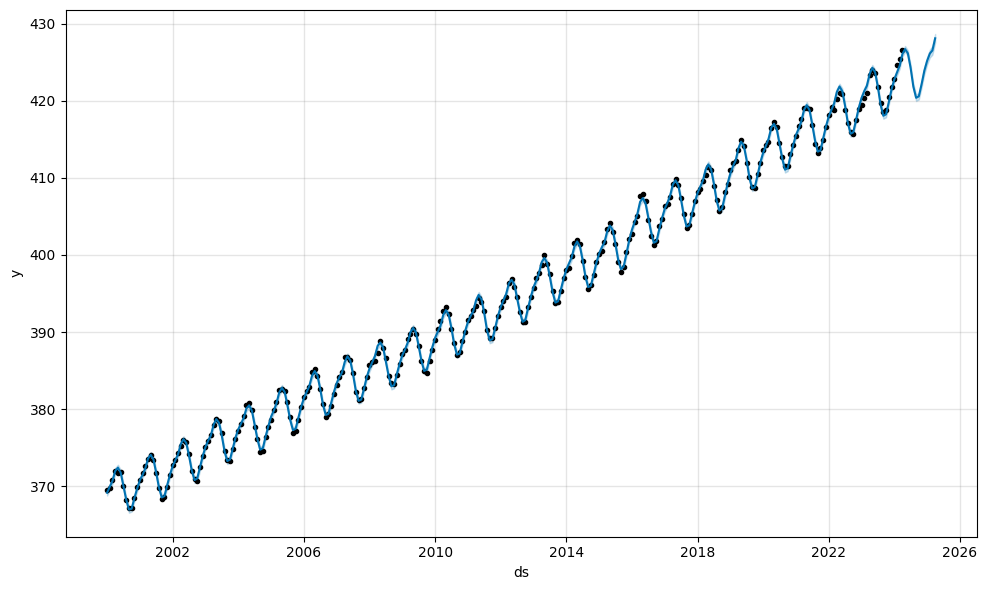

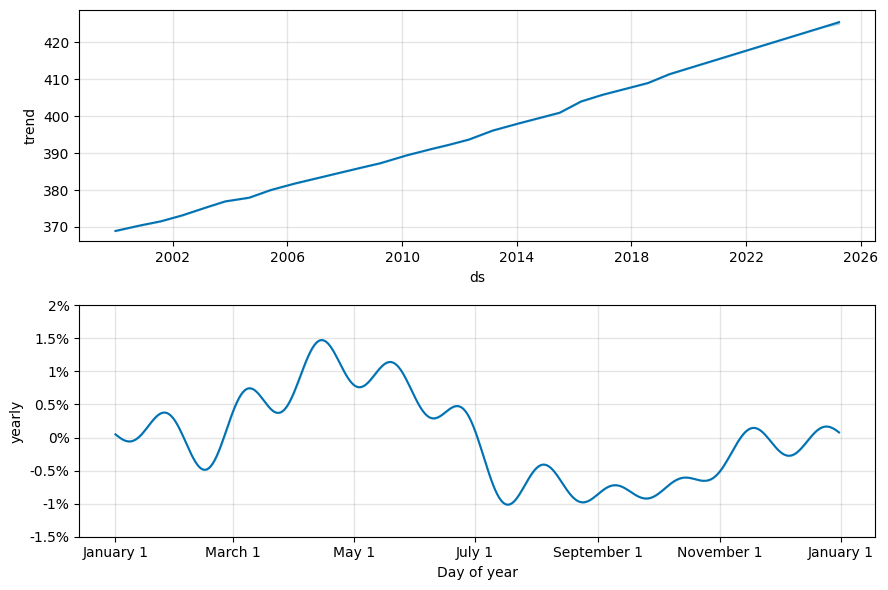

In [ ]:
from prophet.plot import plot, plot_components
from matplotlib import pyplot as plt

plot(model, forecast)
plot_components(model, forecast)
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2000-01-01,368.907547,368.786864,369.550708,368.907547,368.907547,0.000656,0.000656,0.000656,0.000656,0.000656,0.000656,0.0,0.0,0.0,369.149653
1,2000-02-01,369.056009,369.558735,370.322946,369.056009,369.056009,0.002394,0.002394,0.002394,0.002394,0.002394,0.002394,0.0,0.0,0.0,369.939473
2,2000-03-01,369.194893,370.287078,371.071990,369.194893,369.194893,0.004015,0.004015,0.004015,0.004015,0.004015,0.004015,0.0,0.0,0.0,370.677364
3,2000-04-01,369.343355,371.570107,372.364308,369.343355,369.343355,0.007129,0.007129,0.007129,0.007129,0.007129,0.007129,0.0,0.0,0.0,371.976389
4,2000-05-01,369.487028,372.001498,372.782864,369.487028,369.487028,0.007871,0.007871,0.007871,0.007871,0.007871,0.007871,0.0,0.0,0.0,372.395436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2024-11-30,424.668562,423.423851,424.375296,424.471349,424.876052,-0.001837,-0.001837,-0.001837,-0.001837,-0.001837,-0.001837,0.0,0.0,0.0,423.888587
300,2024-12-31,424.870437,424.695567,425.662211,424.616364,425.129497,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.0,0.0,0.0,425.174573
301,2025-01-31,425.072313,425.627815,426.655605,424.751849,425.393469,0.002511,0.002511,0.002511,0.002511,0.002511,0.002511,0.0,0.0,0.0,426.139689
302,2025-02-28,425.254652,425.982162,427.106531,424.877141,425.649937,0.003005,0.003005,0.003005,0.003005,0.003005,0.003005,0.0,0.0,0.0,426.532649


In [ ]:
from prophet.plot import plot, plot_components
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

df_metrics = performance_metrics(df_cv)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


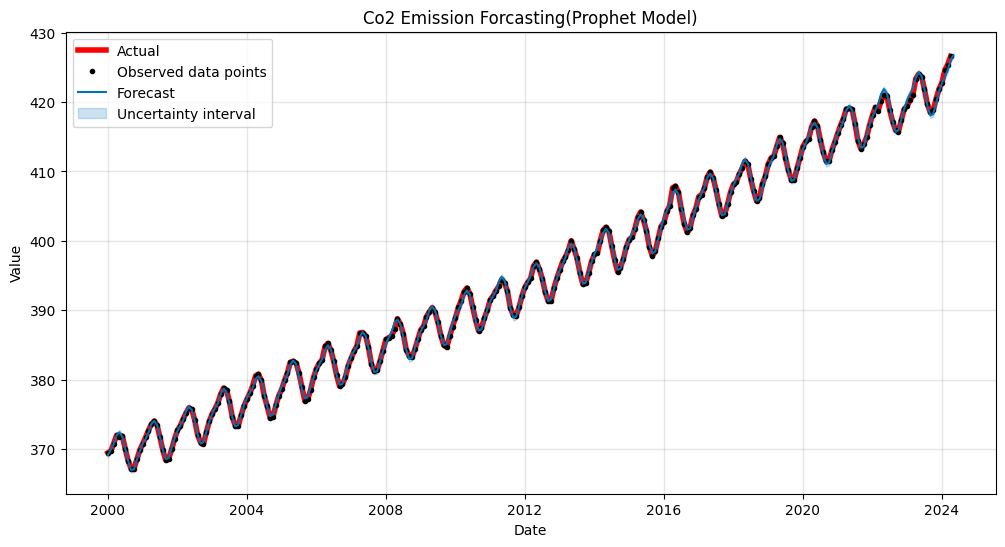

In [ ]:
# Plotting the forecast and actual data with intervals
from prophet.plot import plot

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the actual data
ax.plot(model.history['ds'], model.history['y'], color='red', linewidth=4, label='Actual')

# Plot the forecasted values and intervals
plot(model, forecast, ax=ax, uncertainty=True)

# Add title and labels
plt.title('Co2 Emission Forcasting(Prophet Model)')
plt.xlabel('Date')
plt.ylabel('Value')

# Add a legend with different colors
plt.legend()

# Display the plot
plt.show()

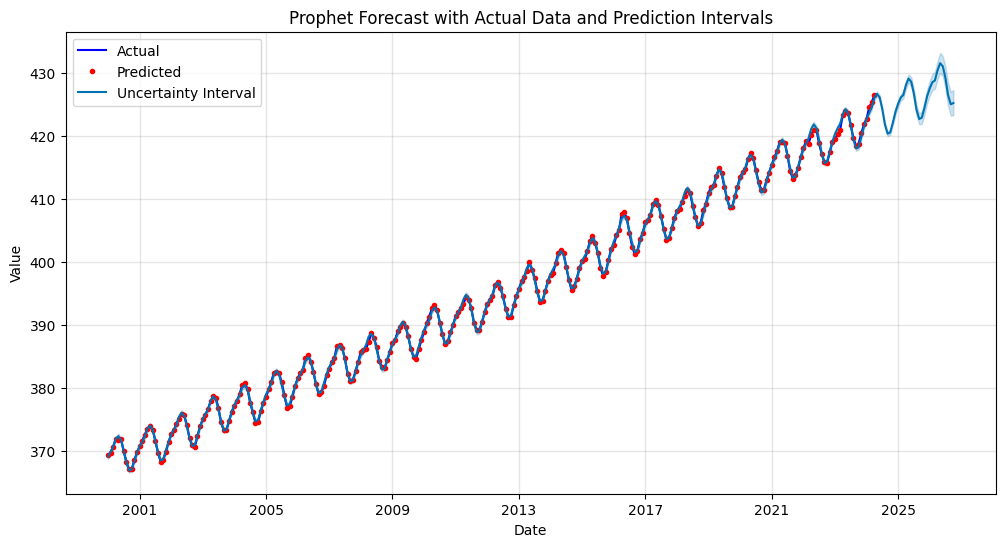

In [ ]:
import matplotlib.pyplot as plt
from prophet.plot import plot


fig, ax = plt.subplots(figsize=(12, 6))

# Plot the actual data
ax.plot(model.history['ds'], model.history['y'], color='red', label='Actual')

plot(model, forecast, ax=ax, uncertainty=True)

forecast_line = ax.get_lines()[1]
forecast_line.set_color('red')

plt.title('Prophet Forecast with Actual Data and Prediction Intervals')
plt.xlabel('Date')
plt.ylabel('Value')

# Add a legend with different colors
plt.legend(['Actual', 'Predicted', 'Uncertainty Interval'])

# Display the plot
plt.show()
